In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
df = pd.read_csv('/content/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#fill na
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Data Manipulation:
a. Find the total number of male customers
b. Find the total number of customers whose Internet Service is ‘DSL’
c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’
d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’

In [4]:
#Find the total number of male customers
df[df['gender']=='Male'].shape[0]



3555

In [5]:
#Find the total number of customers whose Internet Service is ‘DSL’ in InternetService column
df[df['InternetService']=='DSL'].shape[0]


2421

In [6]:
#Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’ d

new_customer = df[(df['gender']=='Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [12]:
#df dtype
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [13]:
#TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [14]:
#Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_cust’

new_cust = df[(df['tenure']<10) | (df['TotalCharges']<500)]
new_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


Data Visualization:
a. Build a pie-chart to show the distribution of customers would be churning out
b. Build a bar-plot to show the distribution of ‘Internet Service’

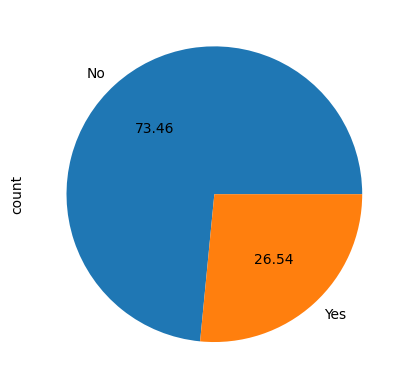

In [15]:
#Build a piechart to show the distribution of customers would be 'Churn'.
df['Churn'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()



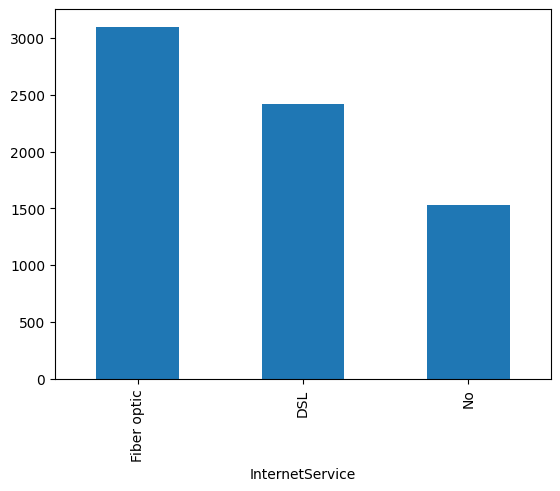

In [16]:
#bar chart InternetService
df['InternetService'].value_counts().plot(kind='bar')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Label encode each column using the same LabelEncoder instance
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])



In [28]:
df.dtypes

,0
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64


In [29]:
#drop customerID
df.drop('customerID', axis=1, inplace=True)

Model Building:
a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense

In [32]:

X = df[['tenure']].values  # Feature
y = df['Churn'].values     # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Build the Sequential model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(1,)))  # Input layer with 12 nodes
model.add(Dense(8, activation='relu'))                     # Hidden layer with 8 nodes
model.add(Dense(1, activation='sigmoid'))                  # Output layer


In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [35]:
# Fit the model on the training set
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, verbose=0)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[930 106]
 [239 134]]


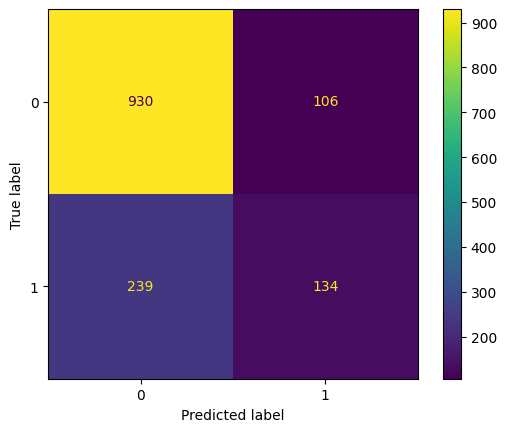

In [36]:
# Predict the values on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


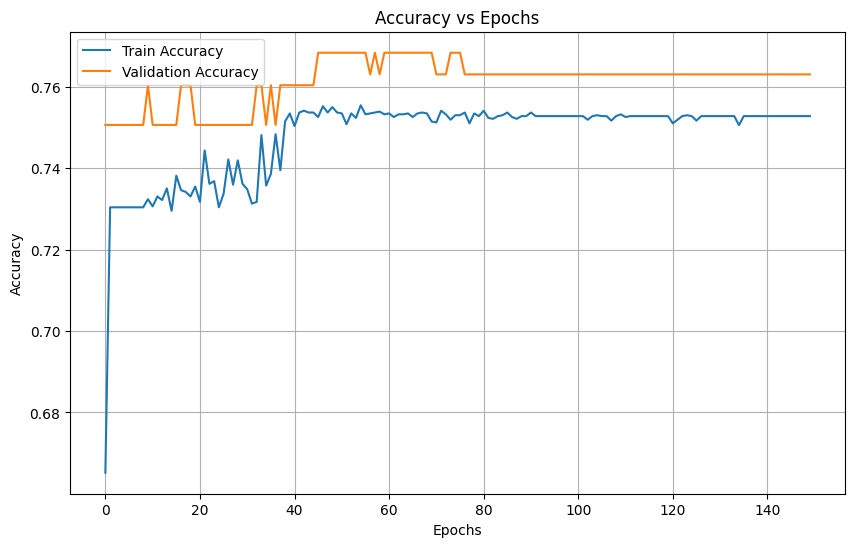

In [37]:
# Plotting Accuracy vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Build the 2nd model using same target and feature variables:
i. Add a drop-out layer after the input layer with drop-out value of 0.3
ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
iii. Predict the values on the test set and build a confusion matrix
iv. Plot the ‘Accuracy vs Epochs’ graph.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix with Dropout:
 [[1036    0]
 [ 373    0]]


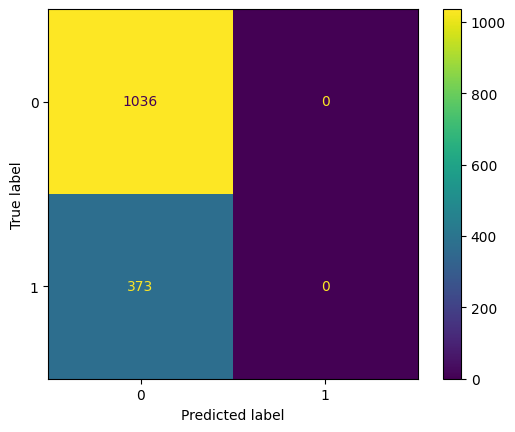

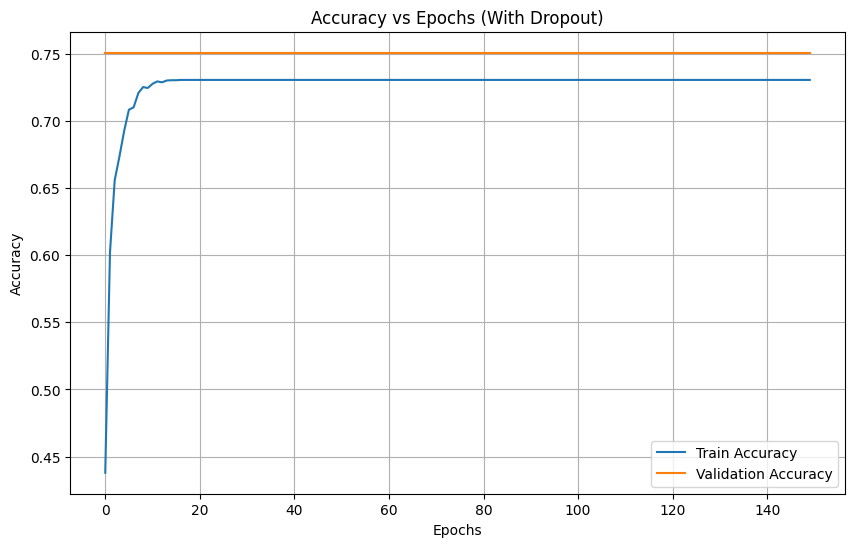

In [39]:
from keras.layers import Dense, Dropout
# Build the Sequential Model with Dropout Layers
model_with_dropout = Sequential()
model_with_dropout.add(Dense(12, activation='relu', input_shape=(1,)))  # Input layer with 12 nodes
model_with_dropout.add(Dropout(0.3))                                  # Drop-out layer after input layer
model_with_dropout.add(Dense(8, activation='relu'))                   # Hidden layer with 8 nodes
model_with_dropout.add(Dropout(0.2))                                  # Drop-out layer after hidden layer
model_with_dropout.add(Dense(1, activation='sigmoid'))                # Output layer

# Compile the Model
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the Model
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=150, validation_split=0.2, verbose=0)

# Predict the values on the test set
y_pred_with_dropout = (model_with_dropout.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary

# Build and display a confusion matrix
cm_with_dropout = confusion_matrix(y_test, y_pred_with_dropout)
print("Confusion Matrix with Dropout:\n", cm_with_dropout)

disp_with_dropout = ConfusionMatrixDisplay(confusion_matrix=cm_with_dropout)
disp_with_dropout.plot()
plt.show()

# Plot Accuracy vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(history_with_dropout.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix for Third Model:
 [[1036    0]
 [ 373    0]]


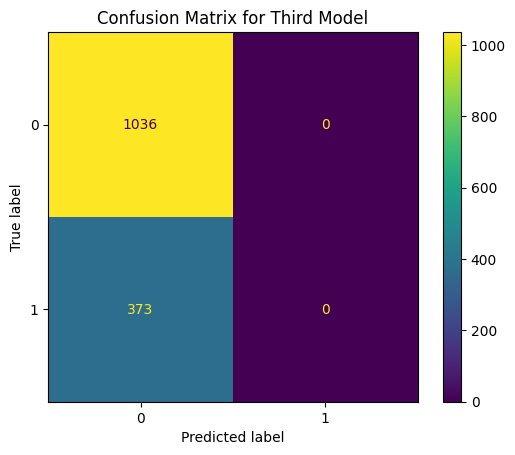

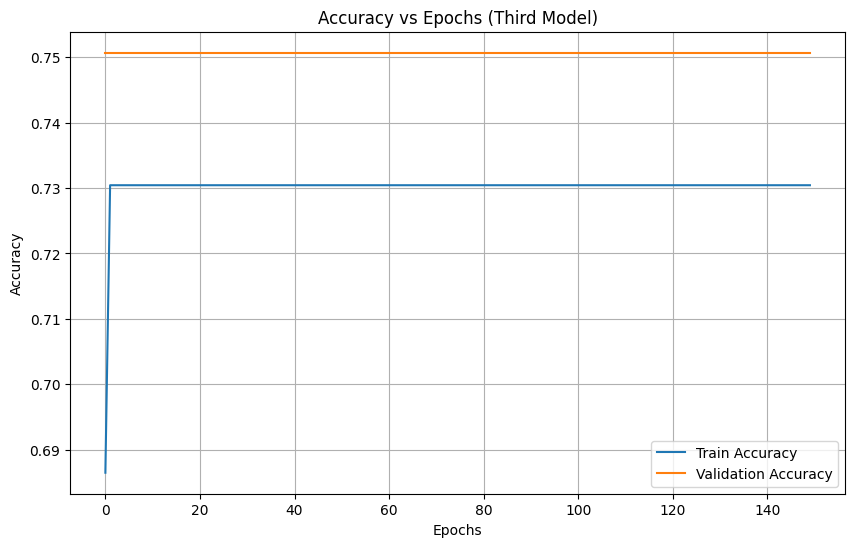

In [40]:
# Step 1: Extract Features and Target Variable
X_new = df[['tenure', 'MonthlyCharges', 'TotalCharges']].values  # Features
y_new = df['Churn'].values                                       # Target

# Step 2: Split the Data into Training and Test Sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Step 3: Build the Sequential Model
model_third = Sequential()
model_third.add(Dense(12, activation='relu', input_shape=(3,)))  # Input layer with 12 nodes
model_third.add(Dense(8, activation='relu'))                     # Hidden layer with 8 nodes
model_third.add(Dense(1, activation='sigmoid'))                  # Output layer

# Step 4: Compile the Model
model_third.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Fit the Model
history_third = model_third.fit(X_train_new, y_train_new, epochs=150, validation_split=0.2, verbose=0)

# Step 6: Predict the values on the test set
y_pred_third = (model_third.predict(X_test_new) > 0.5).astype("int32")  # Convert probabilities to binary

# Step 7: Build and display a confusion matrix
cm_third = confusion_matrix(y_test_new, y_pred_third)
print("Confusion Matrix for Third Model:\n", cm_third)

disp_third = ConfusionMatrixDisplay(confusion_matrix=cm_third)
disp_third.plot()
plt.title("Confusion Matrix for Third Model")
plt.show()

# Step 8: Plot Accuracy vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(history_third.history['accuracy'], label='Train Accuracy')
plt.plot(history_third.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs (Third Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
